<a href="https://www.kaggle.com/code/singhayush16/spaceship-titanic?scriptVersionId=140806752" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.linear_model import LinearRegression
model=LinearRegression()
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


/kaggle/input/spaceship-titanic/sample_submission.csv
/kaggle/input/spaceship-titanic/train.csv
/kaggle/input/spaceship-titanic/test.csv


# **Training Part**

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
train=pd.read_csv('/kaggle/input/spaceship-titanic/train.csv',index_col='PassengerId')
train.head()

,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
PassengerId,,,,,,,,,,,,,
0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8693 entries, 0001_01 to 9280_02
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   HomePlanet    8492 non-null   object 
 1   CryoSleep     8476 non-null   object 
 2   Cabin         8494 non-null   object 
 3   Destination   8511 non-null   object 
 4   Age           8514 non-null   float64
 5   VIP           8490 non-null   object 
 6   RoomService   8512 non-null   float64
 7   FoodCourt     8510 non-null   float64
 8   ShoppingMall  8485 non-null   float64
 9   Spa           8510 non-null   float64
 10  VRDeck        8505 non-null   float64
 11  Name          8493 non-null   object 
 12  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(6)
memory usage: 891.4+ KB


In [5]:
train.describe()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
count,8514.000000,8512.000000,8510.000000,8485.000000,8510.000000,8505.000000
mean,28.827930,224.687617,458.077203,173.729169,311.138778,304.854791
std,14.489021,666.717663,1611.489240,604.696458,1136.705535,1145.717189
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,38.000000,47.000000,76.000000,27.000000,59.000000,46.000000
max,79.000000,14327.000000,29813.000000,23492.000000,22408.000000,24133.000000


In [6]:
train.duplicated().any()

False

In [7]:
train.isnull().sum()

HomePlanet      201
CryoSleep       217
Cabin           199
Destination     182
Age             179
VIP             203
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
Name            200
Transported       0
dtype: int64

In [8]:
df=train.copy()
df.dropna(inplace=True)
df.head()

,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
PassengerId,,,,,,,,,,,,,
0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


In [9]:
df.isnull().sum()

HomePlanet      0
CryoSleep       0
Cabin           0
Destination     0
Age             0
VIP             0
RoomService     0
FoodCourt       0
ShoppingMall    0
Spa             0
VRDeck          0
Name            0
Transported     0
dtype: int64

In [10]:
train.shape,df.shape

((8693, 13), (6606, 13))

In [11]:
df[['deck', 'num', 'side']]=df.Cabin.str.split('/',expand=True)
df.num=df.num.astype(float)
df.head()

,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,deck,num,side
PassengerId,,,,,,,,,,,,,,,,
0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False,B,0.0,P
0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True,F,0.0,S
0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False,A,0.0,S
0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False,A,0.0,S
0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True,F,1.0,S


In [12]:
df.drop(['Cabin'],axis=1,inplace=True)
df.head()

,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,deck,num,side
PassengerId,,,,,,,,,,,,,,,
0001_01,Europa,False,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False,B,0.0,P
0002_01,Earth,False,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True,F,0.0,S
0003_01,Europa,False,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False,A,0.0,S
0003_02,Europa,False,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False,A,0.0,S
0004_01,Earth,False,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True,F,1.0,S


In [13]:
from sklearn.preprocessing import LabelEncoder
le_HP=LabelEncoder()
le_CS=LabelEncoder()
le_Dest=LabelEncoder()
le_VIP=LabelEncoder()
le_Transported=LabelEncoder()
le_deck=LabelEncoder()
le_side=LabelEncoder()

In [14]:
df['HomePlanet']=le_HP.fit_transform(df['HomePlanet'])
df['CryoSleep']=le_HP.fit_transform(df['CryoSleep'])
df['Destination']=le_HP.fit_transform(df['Destination'])
df['VIP']=le_HP.fit_transform(df['VIP'])
df['Transported']=le_HP.fit_transform(df['Transported'])
df['deck']=le_HP.fit_transform(df['deck'])
df['side']=le_HP.fit_transform(df['side'])
df.head()

,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,deck,num,side
PassengerId,,,,,,,,,,,,,,,
0001_01,1,0,2,39.0,0,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,0,1,0.0,0
0002_01,0,0,2,24.0,0,109.0,9.0,25.0,549.0,44.0,Juanna Vines,1,5,0.0,1
0003_01,1,0,2,58.0,1,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,0,0,0.0,1
0003_02,1,0,2,33.0,0,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,0,0,0.0,1
0004_01,0,0,2,16.0,0,303.0,70.0,151.0,565.0,2.0,Willy Santantines,1,5,1.0,1


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6606 entries, 0001_01 to 9280_02
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   HomePlanet    6606 non-null   int64  
 1   CryoSleep     6606 non-null   int64  
 2   Destination   6606 non-null   int64  
 3   Age           6606 non-null   float64
 4   VIP           6606 non-null   int64  
 5   RoomService   6606 non-null   float64
 6   FoodCourt     6606 non-null   float64
 7   ShoppingMall  6606 non-null   float64
 8   Spa           6606 non-null   float64
 9   VRDeck        6606 non-null   float64
 10  Name          6606 non-null   object 
 11  Transported   6606 non-null   int64  
 12  deck          6606 non-null   int64  
 13  num           6606 non-null   float64
 14  side          6606 non-null   int64  
dtypes: float64(7), int64(7), object(1)
memory usage: 825.8+ KB


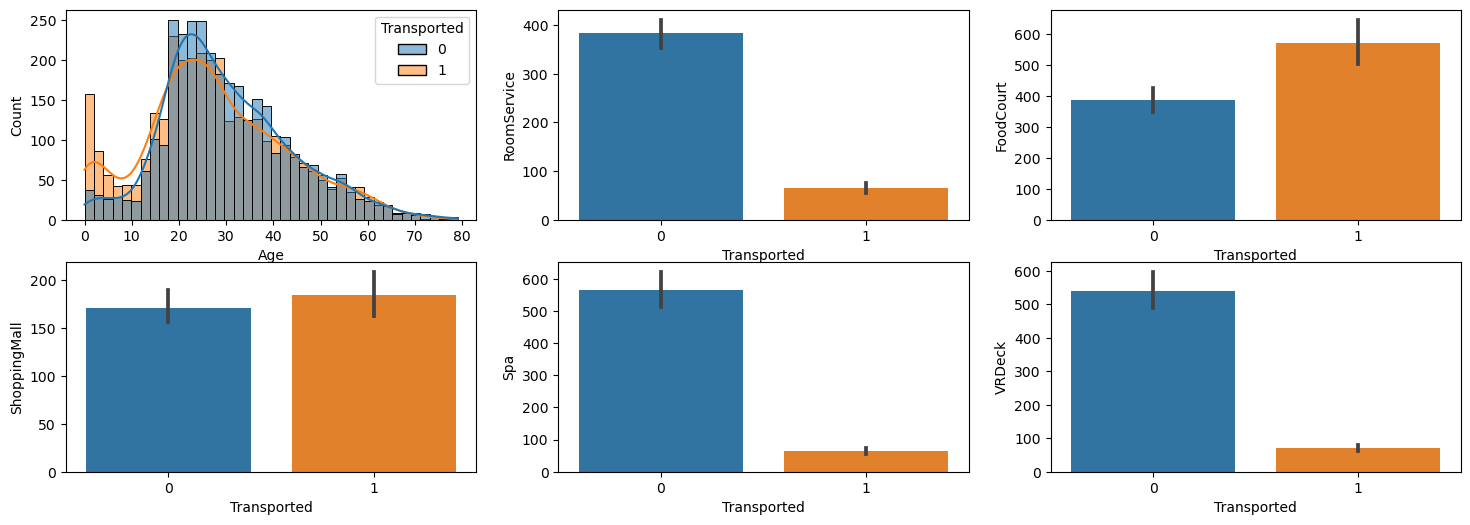

In [16]:
fig,axes=plt.subplots(2,3,figsize=(18,6))
sns.histplot(ax=axes[0,0],data=df,x='Age',hue='Transported',kde=True)
sns.barplot(ax=axes[0,1],data=df,x='Transported',y='RoomService')
sns.barplot(ax=axes[0,2],data=df,x='Transported',y='FoodCourt')
sns.barplot(ax=axes[1,0],data=df,x='Transported',y='ShoppingMall')
sns.barplot(ax=axes[1,1],data=df,x='Transported',y='Spa')
sns.barplot(ax=axes[1,2],data=df,x='Transported',y='VRDeck')
plt.show()

In [17]:
y=df['Transported']
X=df.drop(['Transported','Name'],axis=1)

In [18]:
X.shape,y.shape

((6606, 13), (6606,))

In [19]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=10,test_size=0.2)

In [20]:
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((5284, 13), (1322, 13), (5284,), (1322,))

**Logistic Regression**

In [21]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression(max_iter=10000)
lr.fit(X_train,y_train)

LogisticRegression(max_iter=10000)

In [22]:
y_lr_pred=lr.predict(X_test)

In [23]:
lr.score(X_test,y_test)

0.7851739788199698

In [24]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [25]:
accuracy_score(y_test,y_lr_pred)

0.7851739788199698

In [26]:
cm_lr=confusion_matrix(y_test,y_lr_pred)
cm_lr

array([[504, 151],
       [133, 534]])

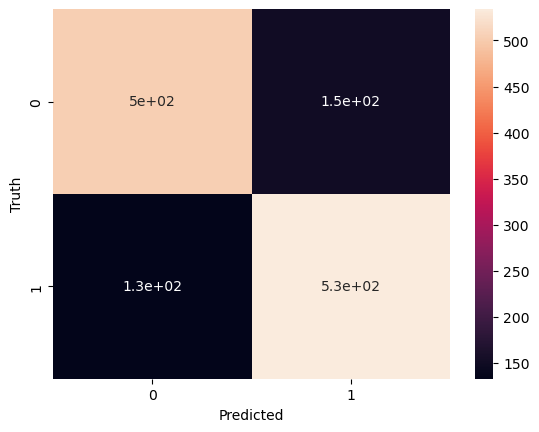

In [27]:
sns.heatmap(cm_lr,annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.show()

In [28]:
print(classification_report(y_test,y_lr_pred))

              precision    recall  f1-score   support

           0       0.79      0.77      0.78       655
           1       0.78      0.80      0.79       667

    accuracy                           0.79      1322
   macro avg       0.79      0.79      0.79      1322
weighted avg       0.79      0.79      0.79      1322



**Decision Tree**

In [29]:
from sklearn.tree import DecisionTreeClassifier
dtc=DecisionTreeClassifier(max_leaf_nodes=455,random_state=10)
dtc.fit(X_train,y_train)

DecisionTreeClassifier(max_leaf_nodes=455, random_state=10)

In [30]:
y_dtc_pred=dtc.predict(X_test)

In [31]:
dtc.score(X_test,y_test)

0.764750378214826

In [32]:
cm_dtc=confusion_matrix(y_test,y_dtc_pred)
cm_dtc

array([[501, 154],
       [157, 510]])

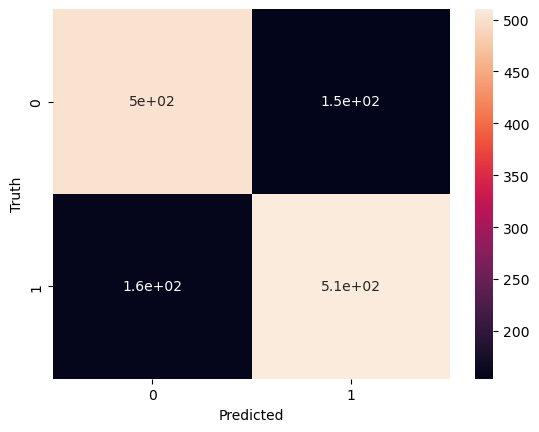

In [33]:
sns.heatmap(cm_dtc,annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.show()

In [34]:
print(classification_report(y_test,y_dtc_pred))

              precision    recall  f1-score   support

           0       0.76      0.76      0.76       655
           1       0.77      0.76      0.77       667

    accuracy                           0.76      1322
   macro avg       0.76      0.76      0.76      1322
weighted avg       0.76      0.76      0.76      1322



**Random Forest**

In [35]:
from sklearn.ensemble import RandomForestClassifier
rfc=RandomForestClassifier(n_estimators=805,random_state=10)
rfc.fit(X_train,y_train)

RandomForestClassifier(n_estimators=805, random_state=10)

In [36]:
y_rfc_predict=rfc.predict(X_test)

In [37]:
rfc.score(X_test,y_test)

0.7965204236006052

In [38]:
cm_rfc=confusion_matrix(y_test,y_rfc_predict)
cm_rfc

array([[545, 110],
       [159, 508]])

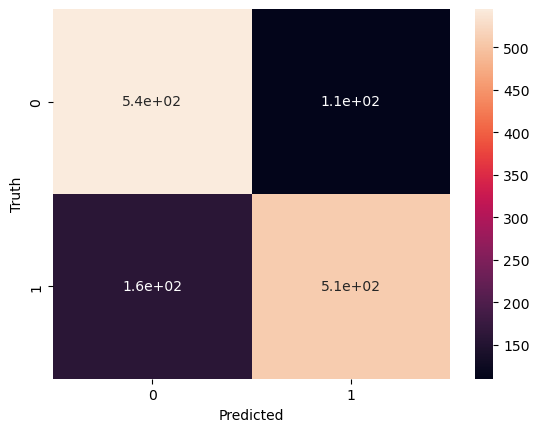

In [39]:
sns.heatmap(cm_rfc,annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.show()

In [40]:
print(classification_report(y_test,y_rfc_predict))

              precision    recall  f1-score   support

           0       0.77      0.83      0.80       655
           1       0.82      0.76      0.79       667

    accuracy                           0.80      1322
   macro avg       0.80      0.80      0.80      1322
weighted avg       0.80      0.80      0.80      1322



**Support Vector Machine**

In [41]:
from sklearn.svm import SVC
svc_C=SVC(C=10,random_state=10)
svc_C.fit(X_train,y_train)
svc_C.score(X_test,y_test)

0.7912254160363086

In [42]:
svc_g=SVC(gamma=5,random_state=10)
svc_g.fit(X_train,y_train)
svc_g.score(X_test,y_test)

0.5045385779122542

In [43]:
svc_k=SVC(kernel='rbf',random_state=10)
svc_k.fit(X_train,y_train)
svc_k.score(X_test,y_test)

0.7829046898638427

In [44]:
y_svc_pred=svc_C.predict(X_test)

In [45]:
svc_C.score(X_test,y_test)

0.7912254160363086

In [46]:
cm_svc=confusion_matrix(y_test,y_svc_pred)
cm_svc

array([[472, 183],
       [ 93, 574]])

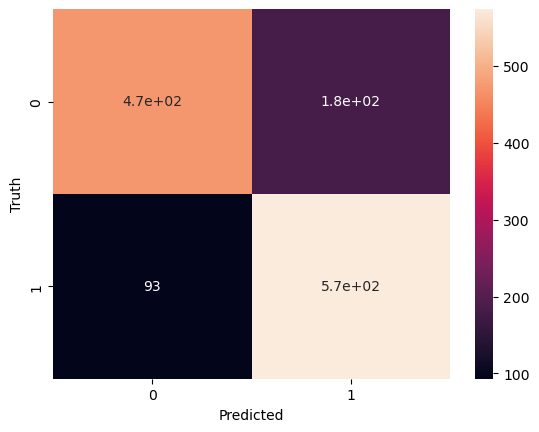

In [47]:
sns.heatmap(cm_svc,annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.show()

In [48]:
print(classification_report(y_test,y_svc_pred))

              precision    recall  f1-score   support

           0       0.84      0.72      0.77       655
           1       0.76      0.86      0.81       667

    accuracy                           0.79      1322
   macro avg       0.80      0.79      0.79      1322
weighted avg       0.80      0.79      0.79      1322



**As we have 80% accuracy in Random Forest Classifier. So, we use that only.**

# **Testing Part**

In [49]:
test=pd.read_csv('/kaggle/input/spaceship-titanic/test.csv',index_col='PassengerId')
test.head()

,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name
PassengerId,,,,,,,,,,,,
0013_01,Earth,True,G/3/S,TRAPPIST-1e,27.0,False,0.0,0.0,0.0,0.0,0.0,Nelly Carsoning
0018_01,Earth,False,F/4/S,TRAPPIST-1e,19.0,False,0.0,9.0,0.0,2823.0,0.0,Lerome Peckers
0019_01,Europa,True,C/0/S,55 Cancri e,31.0,False,0.0,0.0,0.0,0.0,0.0,Sabih Unhearfus
0021_01,Europa,False,C/1/S,TRAPPIST-1e,38.0,False,0.0,6652.0,0.0,181.0,585.0,Meratz Caltilter
0023_01,Earth,False,F/5/S,TRAPPIST-1e,20.0,False,10.0,0.0,635.0,0.0,0.0,Brence Harperez


In [50]:
test.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4277 entries, 0013_01 to 9277_01
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   HomePlanet    4190 non-null   object 
 1   CryoSleep     4184 non-null   object 
 2   Cabin         4177 non-null   object 
 3   Destination   4185 non-null   object 
 4   Age           4186 non-null   float64
 5   VIP           4184 non-null   object 
 6   RoomService   4195 non-null   float64
 7   FoodCourt     4171 non-null   float64
 8   ShoppingMall  4179 non-null   float64
 9   Spa           4176 non-null   float64
 10  VRDeck        4197 non-null   float64
 11  Name          4183 non-null   object 
dtypes: float64(6), object(6)
memory usage: 434.4+ KB


In [51]:
test.describe()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
count,4186.000000,4195.000000,4171.000000,4179.000000,4176.000000,4197.000000
mean,28.658146,219.266269,439.484296,177.295525,303.052443,310.710031
std,14.179072,607.011289,1527.663045,560.821123,1117.186015,1246.994742
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,26.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,37.000000,53.000000,78.000000,33.000000,50.000000,36.000000
max,79.000000,11567.000000,25273.000000,8292.000000,19844.000000,22272.000000


In [52]:
test.duplicated().any()

False

In [53]:
test.isnull().sum()

HomePlanet       87
CryoSleep        93
Cabin           100
Destination      92
Age              91
VIP              93
RoomService      82
FoodCourt       106
ShoppingMall     98
Spa             101
VRDeck           80
Name             94
dtype: int64

In [54]:
test[['deck', 'num', 'side']]=test.Cabin.str.split('/',expand=True)
test.head()

,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,deck,num,side
PassengerId,,,,,,,,,,,,,,,
0013_01,Earth,True,G/3/S,TRAPPIST-1e,27.0,False,0.0,0.0,0.0,0.0,0.0,Nelly Carsoning,G,3,S
0018_01,Earth,False,F/4/S,TRAPPIST-1e,19.0,False,0.0,9.0,0.0,2823.0,0.0,Lerome Peckers,F,4,S
0019_01,Europa,True,C/0/S,55 Cancri e,31.0,False,0.0,0.0,0.0,0.0,0.0,Sabih Unhearfus,C,0,S
0021_01,Europa,False,C/1/S,TRAPPIST-1e,38.0,False,0.0,6652.0,0.0,181.0,585.0,Meratz Caltilter,C,1,S
0023_01,Earth,False,F/5/S,TRAPPIST-1e,20.0,False,10.0,0.0,635.0,0.0,0.0,Brence Harperez,F,5,S


In [55]:
test.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4277 entries, 0013_01 to 9277_01
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   HomePlanet    4190 non-null   object 
 1   CryoSleep     4184 non-null   object 
 2   Cabin         4177 non-null   object 
 3   Destination   4185 non-null   object 
 4   Age           4186 non-null   float64
 5   VIP           4184 non-null   object 
 6   RoomService   4195 non-null   float64
 7   FoodCourt     4171 non-null   float64
 8   ShoppingMall  4179 non-null   float64
 9   Spa           4176 non-null   float64
 10  VRDeck        4197 non-null   float64
 11  Name          4183 non-null   object 
 12  deck          4177 non-null   object 
 13  num           4177 non-null   object 
 14  side          4177 non-null   object 
dtypes: float64(6), object(9)
memory usage: 534.6+ KB


In [56]:
te_HP=LabelEncoder()
te_CS=LabelEncoder()
te_Dest=LabelEncoder()
te_VIP=LabelEncoder()
te_Transported=LabelEncoder()
te_deck=LabelEncoder()
te_side=LabelEncoder()

In [57]:
df_test=test.copy()
df_test.head()

,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,deck,num,side
PassengerId,,,,,,,,,,,,,,,
0013_01,Earth,True,G/3/S,TRAPPIST-1e,27.0,False,0.0,0.0,0.0,0.0,0.0,Nelly Carsoning,G,3,S
0018_01,Earth,False,F/4/S,TRAPPIST-1e,19.0,False,0.0,9.0,0.0,2823.0,0.0,Lerome Peckers,F,4,S
0019_01,Europa,True,C/0/S,55 Cancri e,31.0,False,0.0,0.0,0.0,0.0,0.0,Sabih Unhearfus,C,0,S
0021_01,Europa,False,C/1/S,TRAPPIST-1e,38.0,False,0.0,6652.0,0.0,181.0,585.0,Meratz Caltilter,C,1,S
0023_01,Earth,False,F/5/S,TRAPPIST-1e,20.0,False,10.0,0.0,635.0,0.0,0.0,Brence Harperez,F,5,S


In [58]:
df_test['HomePlanet']=te_HP.fit_transform(df_test['HomePlanet'])
df_test['CryoSleep']=te_HP.fit_transform(df_test['CryoSleep'])
df_test['Destination']=te_HP.fit_transform(df_test['Destination'])
df_test['VIP']=te_HP.fit_transform(df_test['VIP'])
df_test['deck']=te_HP.fit_transform(df_test['deck'])
df_test['side']=te_HP.fit_transform(df_test['side'])
df_test.head()

,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,deck,num,side
PassengerId,,,,,,,,,,,,,,,
0013_01,0,1,G/3/S,2,27.0,0,0.0,0.0,0.0,0.0,0.0,Nelly Carsoning,6,3,1
0018_01,0,0,F/4/S,2,19.0,0,0.0,9.0,0.0,2823.0,0.0,Lerome Peckers,5,4,1
0019_01,1,1,C/0/S,0,31.0,0,0.0,0.0,0.0,0.0,0.0,Sabih Unhearfus,2,0,1
0021_01,1,0,C/1/S,2,38.0,0,0.0,6652.0,0.0,181.0,585.0,Meratz Caltilter,2,1,1
0023_01,0,0,F/5/S,2,20.0,0,10.0,0.0,635.0,0.0,0.0,Brence Harperez,5,5,1


In [59]:
df_test.isnull().sum()

HomePlanet        0
CryoSleep         0
Cabin           100
Destination       0
Age              91
VIP               0
RoomService      82
FoodCourt       106
ShoppingMall     98
Spa             101
VRDeck           80
Name             94
deck              0
num             100
side              0
dtype: int64

In [60]:
df_test.Age.interpolate(inplace=True)
df_test.RoomService.interpolate(inplace=True)
df_test.FoodCourt.interpolate(inplace=True)
df_test.ShoppingMall.interpolate(inplace=True)
df_test.Spa.interpolate(inplace=True)
df_test.VRDeck.interpolate(inplace=True)

In [61]:
df_test.num=df_test.num.astype(float)

In [62]:
df_test.num.interpolate(inplace=True)

In [63]:
df_test.head()

,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,deck,num,side
PassengerId,,,,,,,,,,,,,,,
0013_01,0,1,G/3/S,2,27.0,0,0.0,0.0,0.0,0.0,0.0,Nelly Carsoning,6,3.0,1
0018_01,0,0,F/4/S,2,19.0,0,0.0,9.0,0.0,2823.0,0.0,Lerome Peckers,5,4.0,1
0019_01,1,1,C/0/S,0,31.0,0,0.0,0.0,0.0,0.0,0.0,Sabih Unhearfus,2,0.0,1
0021_01,1,0,C/1/S,2,38.0,0,0.0,6652.0,0.0,181.0,585.0,Meratz Caltilter,2,1.0,1
0023_01,0,0,F/5/S,2,20.0,0,10.0,0.0,635.0,0.0,0.0,Brence Harperez,5,5.0,1


In [64]:
df_Test=df_test.drop(['Name','Cabin'],axis=1)

In [65]:
df_test['Transported']=rfc.predict(df_Test)

In [66]:
df_test.head()

,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,deck,num,side,Transported
PassengerId,,,,,,,,,,,,,,,,
0013_01,0,1,G/3/S,2,27.0,0,0.0,0.0,0.0,0.0,0.0,Nelly Carsoning,6,3.0,1,0
0018_01,0,0,F/4/S,2,19.0,0,0.0,9.0,0.0,2823.0,0.0,Lerome Peckers,5,4.0,1,0
0019_01,1,1,C/0/S,0,31.0,0,0.0,0.0,0.0,0.0,0.0,Sabih Unhearfus,2,0.0,1,1
0021_01,1,0,C/1/S,2,38.0,0,0.0,6652.0,0.0,181.0,585.0,Meratz Caltilter,2,1.0,1,1
0023_01,0,0,F/5/S,2,20.0,0,10.0,0.0,635.0,0.0,0.0,Brence Harperez,5,5.0,1,0


In [67]:
df_test.HomePlanet.unique()

array([0, 1, 2, 3])

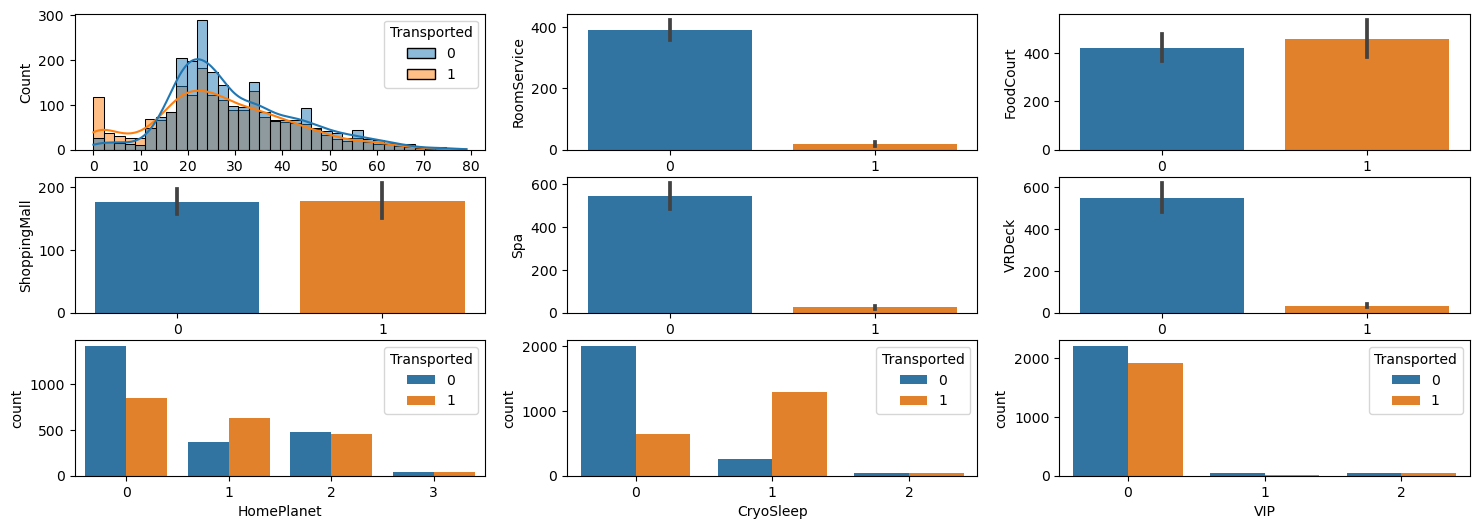

In [68]:
fig,axes=plt.subplots(3,3,figsize=(18,6))
sns.histplot(ax=axes[0,0],data=df_test,x='Age',hue='Transported',kde=True)
sns.barplot(ax=axes[0,1],data=df_test,x='Transported',y='RoomService')
sns.barplot(ax=axes[0,2],data=df_test,x='Transported',y='FoodCourt')
sns.barplot(ax=axes[1,0],data=df_test,x='Transported',y='ShoppingMall')
sns.barplot(ax=axes[1,1],data=df_test,x='Transported',y='Spa')
sns.barplot(ax=axes[1,2],data=df_test,x='Transported',y='VRDeck')
sns.countplot(ax=axes[2,0],data=df_test,x='HomePlanet',hue='Transported')
sns.countplot(ax=axes[2,1],data=df_test,x='CryoSleep',hue='Transported')
sns.countplot(ax=axes[2,2],data=df_test,x='VIP',hue='Transported')
plt.show()

In [69]:
df_test['Transported'].to_csv('submission.csv')